# Neutrons in the Gravitional Field
### Flora Hess (flora.hess@stud.uni-heidelberg.de)<br/>Leonardo K. Reiter (leonardo.reiter@stud.uni-heidelberg.de)<br/>Jason G. Jun (jun.jasongabriel@stud.uni-heidelberg.de)
In case the Plots seem to small please double click. Thank you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = 14, 8
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (0.5, 0.5, 0.5)
plt.rcParams["axes.edgecolor"] = (1.0, 1.0, 1.0)
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["legend.facecolor"]= (1.0, 1.0, 1.0)
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = False

Another interesting application of the Numerov algorithm is the calculation of stationary
states $\Psi(z)$ of neutrons in the gravitational field of the Earth2. For small changes in the
vertical amplitude z the potential can be expressed as  $V(z) = mgz$ for $z \geq 0$. Place a
perfectly reflecting horizontal mirror at $z = 0$ so that $V(z) = \infty$ for $z < 0$. Neutrons that fall onto the mirror are reflected upwards, and so we only seek solutions for $z \geq 0$. After a proper choice of length and energy units (specified below) the equation can be rewritten as

$$\psi''(x) + (\varepsilon - x)\psi(x) = 0 ,$$

where $x = \frac{z}{z_0}$ with $z_0 = \left(\frac{\hbar^2}{2 m^2 g}\right)^{1/3}$ and $\varepsilon = \frac{E}{E_0}$ with $E_0 = mgz_0$.

In [2]:
def numerov(eps, x_lim, h):
    x = np.arange(0, x_lim+h, h)
    y = np.zeros(len(x))
    k = eps - x
    y[0:2] = 0, 1e-3
    for n in range(len(x)-2):
        y[n+2] = ((24-10*h**2*k[n+1])*y[n+1]-(12+h**2*k[n])*y[n])/(12+h**2*k[n+2])
    return (y, x)

def find_eigenvalues(n_max):
    print("\nCalculating Eigenvalues:")
    this_eps, step, h, epss = 0, 1, 1e-3, []
    while len(epss) < n_max:
        print(f"\t\u03B5{chr(8320+len(epss))} = {this_eps:.8f}", end="\r")
        next_eps = this_eps + step
        this_sign = np.sign(numerov(this_eps, this_eps+10, h)[0][-1])
        next_sign = np.sign(numerov(next_eps, next_eps+10, h)[0][-1])
        if this_sign == next_sign:
            this_eps = next_eps
            continue
        if step >= 1e-8:
            step = step/10
            continue
        print(" "*100+f"\r\t\u03B5{chr(8320+len(epss))} = {this_eps:.2f}")
        epss.append(this_eps)
        this_eps, step = next_eps, 1
    return epss

def plot_psi(epss, pdf = False):
    titles = ["Normalizable Wave Function", "Probability Density Function"]
    labels = ["\u03a8(x)", "|\u03a8(x)|\u00B2"]
    print("\nPlotting "+titles[pdf]+":")
    h, x_lim, y_lims, = 1e-3, max(epss)*1.5, []
    fig, ax = plt.subplots(1)
    for eps in epss:
        color = plt.cm.get_cmap("prism")(np.sin(eps)**2)
        y_num, x_num = numerov(eps, x_lim, h)
        y_num = y_num**2 if pdf else y_num
        y_lims.append(max(abs(y_num[x_num<max(epss)])))
        ax.axvline(eps, ls=(0,(10,5)), c=color)
        ax.plot(x_num, y_num, label=labels[pdf]+f"for \u03B5={eps:.2f}", c=color)
        ax.text(eps, y_num[x_num<eps][-1], f"\u03B5 = {eps:.2f}", bbox={"facecolor": color})
    y_lim = (0, max(y_lims)*1.1) if pdf else (-max(y_lims)*1.1, max(y_lims)*1.1)
    ax.set_title(titles[pdf]+" with Numerov Algorithm")
    ax.set_ylim(y_lim)
    ax.set_xlim(0, x_lim)
    ax.set_ylabel(labels[pdf])
    ax.set_xlabel("x")
    ax.set_yticks([0])
    plt.legend()
    plt.show()

### Task 1
Use the Numerov method to solve this differential equation. Choose some values of $\varepsilon$ and plot the solution from $x = 0$ to $x \gg \varepsilon$ (i.e. well into the classically forbidden zone). We are interested in the asymptotic behavior of the solution for large $x$, i.e. whether it goes to positive infinity or negative. Show (plot) two solutions obtained from your program (for two values of $\varepsilon$), one with positive and one with negative asymptotic behavior.


Plotting Normalizable Wave Function:


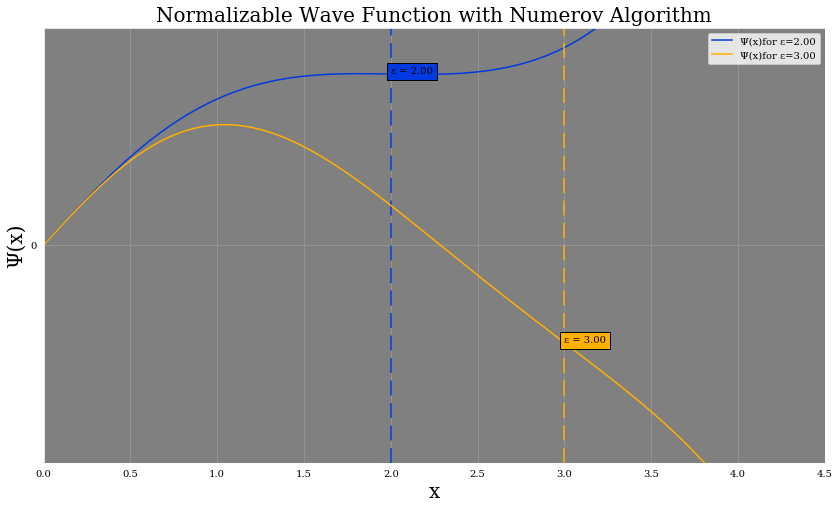

In [3]:
epss = [2, 3]
plot_psi(epss)

### Task 2
The eigenvalues $\varepsilon_n$ of Schrödinger’s equation belong to normalizable eigenfunctions with $\psi(x) \rightarrow 0$ for $x \rightarrow \infty$. It means that while varying $\varepsilon_n$ from smaller to larger values, the function $\psi(x)$ for $x \rightarrow \infty$ changes sign. Use this property to determine the eigenvalues $\varepsilon_n$ of the first three bound states to 2 decimals behind the comma.


Calculating Eigenvalues:
	ε₀ = 2.34                                                                                          
	ε₁ = 4.09                                                                                          
	ε₂ = 5.52                                                                                          

Plotting Normalizable Wave Function:


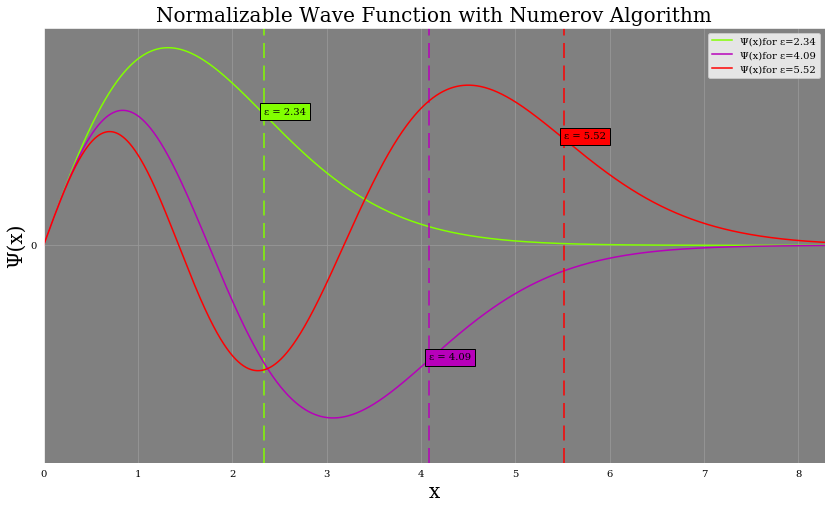


Plotting Probability Density Function:


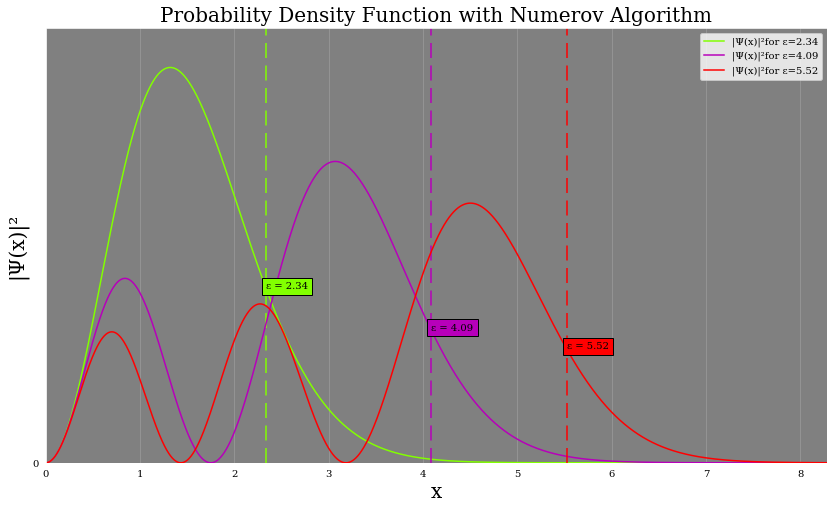

In [4]:
n_max = 3
epss = find_eigenvalues(n_max)

plot_psi(epss)
plot_psi(epss, True)